### 获取管理员账号的Cookies
> 通过使用 Selenium，启动 Microsoft Edge 浏览器并保存登录后的 Cookies

In [17]:
#启动 Microsoft Edge 浏览器
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager

def init_edge_browser():
    # 初始化 Edge 浏览器
    driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
    return driver
# 打开浏览器并等待你手动完成登录操作，一旦登录成功，按下回车键，保存当前的 Cookies
import pickle

def login_and_save_cookies(driver, login_url, cookies_file_path='cookies.pkl'):
    # 打开登录页面
    driver.get(login_url)

    # 等待用户手动完成登录并通过滑块验证
    print("请手动完成登录并通过滑块验证...")

    # 暂停代码执行，等待用户手动登录
    input("登录完成后，按回车键继续...")

    # 获取登录后的 Cookies
    cookies = driver.get_cookies()

    # 保存 Cookies 到文件
    with open(cookies_file_path, 'wb') as f:
        pickle.dump(cookies, f)

    print(f"Cookies 已成功保存到 {cookies_file_path} 文件中。")

### 测试从文件中加载 Cookies，并将其用于后续的爬取任务
> 通过 Requests 模块使用保存的 Cookies 进行后续爬取

In [18]:
#从文件中加载已保存的 Cookies，并将其用于后续的爬取任务
import requests
import pickle

def use_saved_cookies_for_requests(url, cookies_file_path='cookies.pkl'):
    # 创建一个 session
    session = requests.Session()

    # 从文件中加载 cookies
    with open(cookies_file_path, 'rb') as f:
        cookies = pickle.load(f)

    # 将 cookies 加入到 session
    for cookie in cookies:
        session.cookies.set(cookie['name'], cookie['value'])

    # 使用 session 发送请求
    response = session.get(url)

    # 返回响应结果
    if response.status_code == 200:
        print("爬取成功！")
        return response.text
    else:
        print(f"爬取失败，状态码: {response.status_code}")
        return None

### 用 Selenium 加载保存的 Cookies 并访问登录后页面
> Selenium 加载之前保存的 Cookies，并使用它直接访问需要登录的页面

Cookies 已加载到浏览器中。
<html><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="renderer" content="webkit"><meta name="viewport" content="width=device-width,initial-scale=1"><meta name="description" property="og:description" content="千名教师建设，万道高质量题目，百万用户拼题的程序设计实验辅助教学平台"><meta property="og:image" content="//static.pintia.cn/sparkling-daydream/icons/PTA-logo.svg"><meta property="og:image:width" content="240"><meta property="og:image:height" content="150"><link rel="icon" href="//static.pintia.cn/sparkling-daydream/icons/default/android-chrome.png"><link rel="stylesheet" href="https://static.pintia.cn/assets/fonts.css"><link rel="stylesheet" href="https://static.pintia.cn/assets/katex.min.css"><title>PTA | 程序设计类实验辅助教学平台</title><style>#splash {
      position: fixed;
      left: 0;
      top: 0;
      display: -webkit-box;
      display: -webkit-flex;
      display: -moz-box;
      display: -ms-flexbox;
      display: flex;
      height: 100vh;
      wid
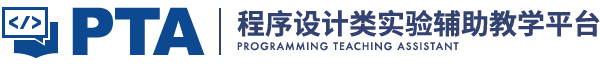

In [20]:
# 使用 Selenium 加载保存的 Cookies 并访问登录后页面
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import pickle
import time


# 初始化 Edge 浏览器
def init_edge_browser():
    driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
    return driver


# 从文件中加载 Cookies 并添加到 Selenium
def load_cookies(driver, cookies_file_path='cookies.pkl'):
    with open(cookies_file_path, 'rb') as f:
        cookies = pickle.load(f)

    # 打开一个初始页面，以便 Selenium 可以加载 Cookies
    driver.get("https://pintia.cn")

    # 将每个 cookie 加入到浏览器
    for cookie in cookies:
        driver.add_cookie(cookie)

    print("Cookies 已加载到浏览器中。")


# 访问登录后页面
def access_protected_page(driver, url):
    # 访问需要登录的页面
    driver.get(url)

    # 等待页面完全加载
    time.sleep(5)

    # 获取并返回页面源码
    page_content = driver.page_source
    return page_content


# 使用示例
if __name__ == "__main__":
    # 初始化 Edge 浏览器
    driver = init_edge_browser()

    # 加载保存的 Cookies
    load_cookies(driver)

    # 访问需要登录的页面
    protected_page_url = "https://pintia.cn/home/account"
    page_content = access_protected_page(driver, protected_page_url)

    # 打印页面内容
    print(page_content)

    # 关闭浏览器
    driver.quit()
